In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
%matplotlib inline

In [2]:
def load_halo_summary(filename):
    dtype=[('Nsat','i8'),
           ('vmax', 'f8'),
           ('mstar', 'f8'), 
           ('d', 'f8'),
           ('r_ab_x', 'f8'), ('r_ab_y', 'f8'),('r_ab_z','f8'),
           ('min_r_sat', 'f8'), ('max_r_sat', 'f8'),
           ('a', 'f8'),
           ('b', 'f8'),
           ('c', 'f8'),
           ('Ia_x', 'f8'),
           ('Ia_y', 'f8'),
           ('Ia_z', 'f8'),
           ('plane_width', 'f8'),
           ('plane_distance','f8'),
           ('plane_x','f8'),('plane_y','f8'),('plane_z','f8'),
          ('beta', 'f8'),
          ('lambda_1','f8'),('lambda_2','f8'),('lambda_3','f8'),
          ('e_1_x','f8'),('e_1_y','f8'),('e_1_z','f8'),
           ('e_2_x','f8'),('e_2_y','f8'),('e_2_z','f8'),
           ('e_3_x','f8'),('e_3_y','f8'),('e_3_z','f8')]
    file_data = np.loadtxt(filename, dtype=dtype)    
    return file_data

In [3]:
data_path = "../data/mstar_selected_summary"
file_halo_A = os.path.join(data_path, "halo_A.dat")
file_halo_B = os.path.join(data_path, "halo_B.dat")
hubble = 0.73

[ 74.93  73.31   7.97  78.69  45.7   23.98  38.83   2.99  24.93  12.52
   9.91]
[13  9  4 12  9  6  5  4  6  6  5]


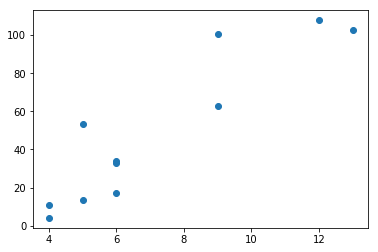

In [4]:
data_halo_A = load_halo_summary(file_halo_A)
data_halo_B = load_halo_summary(file_halo_B)
print(data_halo_B['plane_width'])
print(data_halo_B['Nsat'])
plt.scatter(data_halo_B['Nsat'], data_halo_B['plane_width']/hubble)

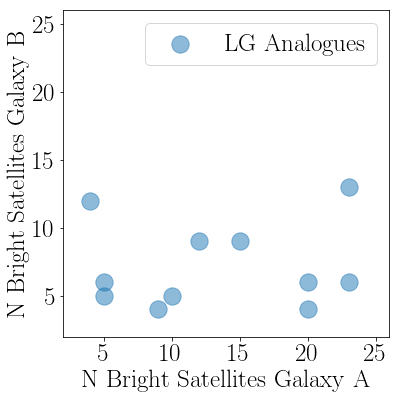

In [5]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

plt.scatter(data_halo_A['Nsat'], data_halo_B['Nsat'], label='LG Analogues',s=300, alpha=0.5)
plt.axes().set_aspect('equal')
plt.xticks(np.arange(0,30,5))
plt.yticks(np.arange(0,30,5))
plt.xlim([2,26])
plt.ylim([2,26])
plt.legend(loc=1)
plt.xlabel(r"N Bright Satellites Galaxy A")
plt.ylabel(r"N Bright Satellites Galaxy B")
plt.savefig("../paper/nsat.pdf", bbox_inches='tight')

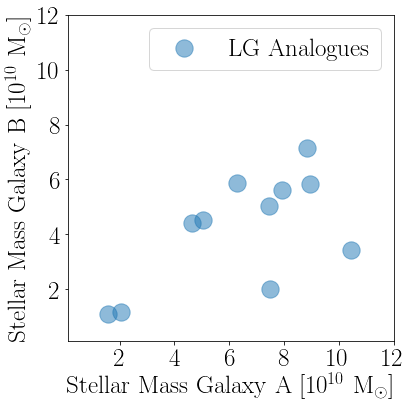

In [6]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

plt.scatter(data_halo_A['mstar']/hubble, data_halo_B['mstar']/hubble, label='LG Analogues', s=300, alpha=0.5)
plt.axes().set_aspect('equal')
plt.xticks(np.arange(0,20,2))
plt.yticks(np.arange(0,20,2))
plt.xlim([0.1,12])
plt.ylim([0.1,12])
plt.legend(loc=1)
plt.xlabel(r"Stellar Mass Galaxy A [$10^{10}$ M$_{\odot}$]")
plt.ylabel(r"Stellar Mass Galaxy B [$10^{10}$ M$_{\odot}$]")
plt.savefig("../paper/mstar.pdf", bbox_inches='tight')

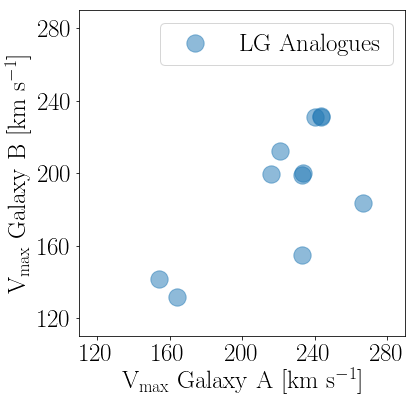

In [7]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

plt.scatter(data_halo_A['vmax'], data_halo_B['vmax'], label='LG Analogues', s=300, alpha=0.5)
plt.axes().set_aspect('equal')
plt.xticks(np.arange(0,360,40))
plt.yticks(np.arange(0,360,40))
plt.xlim([110,290])
plt.ylim([110,290])
plt.legend(loc=1)
plt.xlabel(r"V$_{\rm max}$ Galaxy A [km s$^{-1}$]")
plt.ylabel(r"V$_{\rm max}$ Galaxy B [km s$^{-1}$]")
plt.savefig("../paper/vmax.pdf", bbox_inches='tight')

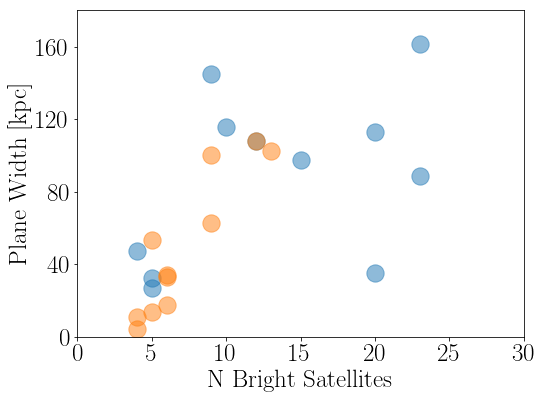

In [8]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

radius_A = data_halo_A['vmax']/(10.0 * 100) * 1000 # in kpc/h
radius_B = data_halo_B['vmax']/(10.0 * 100) * 1000
plt.scatter(data_halo_A['Nsat'], data_halo_A['plane_width']/hubble, label='Galaxy A', s=300, alpha=0.5)
plt.scatter(data_halo_B['Nsat'], data_halo_B['plane_width']/hubble, label='Galaxy B', s=300, alpha=0.5)

#plt.axes().set_aspect('equal', adjustable='datalim')
plt.xticks(np.arange(0,50,5))
plt.yticks(np.arange(0,360,40))
plt.xlim([0,30])
plt.ylim([0,180])
#plt.legend(loc=2)
plt.xlabel(r"N Bright Satellites")
plt.ylabel(r"Plane Width [kpc]")
plt.savefig("../paper/planes.pdf", bbox_inches='tight')

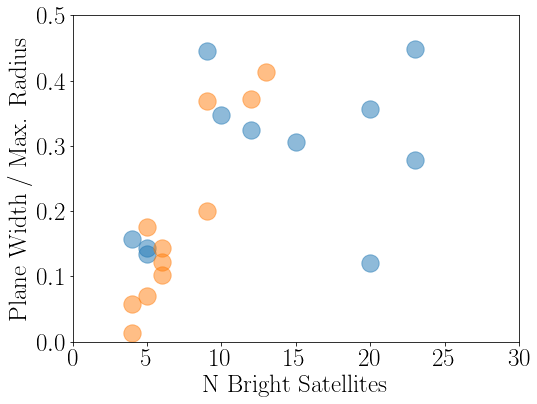

In [9]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

radius_A = data_halo_A['max_r_sat']#data_halo_A['vmax']/(10.0 * 100) * 1000 # in kpc/h
radius_B = data_halo_B['max_r_sat']#/(10.0 * 100) * 1000
plt.scatter(data_halo_A['Nsat'], data_halo_A['plane_width']/radius_A, label='Galaxy A', s=300, alpha=0.5)
plt.scatter(data_halo_B['Nsat'], data_halo_B['plane_width']/radius_B, label='Galaxy B', s=300, alpha=0.5)

#plt.axes().set_aspect('equal', adjustable='datalim')
plt.xticks(np.arange(0,50,5))
plt.yticks(np.arange(0,2,0.1))
plt.xlim([0,30])
plt.ylim([0,0.5])
#plt.legend(loc=2)
plt.xlabel(r"N Bright Satellites")
plt.ylabel(r"Plane Width / Max. Radius")
plt.savefig("../paper/planes_normalized.pdf", bbox_inches='tight')

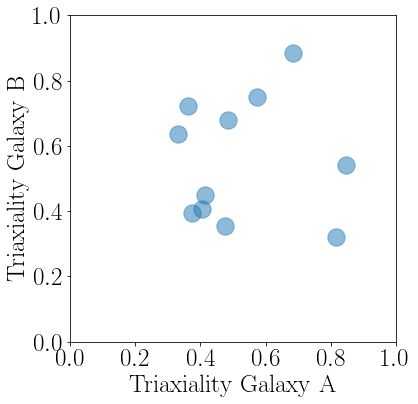

In [10]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

T_A = (data_halo_A['a']**2 - data_halo_A['b']**2)/(data_halo_A['a']**2 - data_halo_A['c']**2)
T_B = (data_halo_B['a']**2 - data_halo_B['b']**2)/(data_halo_B['a']**2 - data_halo_B['c']**2)

plt.scatter(T_A, T_B, label='Galaxy A', s=300, alpha=0.5)

plt.axes().set_aspect('equal')
plt.xticks(np.arange(0,2,0.2))
plt.yticks(np.arange(0,2,0.2))
plt.xlim([0,1])
plt.ylim([0,1])
#plt.legend(loc=2)
plt.xlabel(r"Triaxiality Galaxy A")
plt.ylabel(r"Triaxiality Galaxy B")
plt.savefig("../paper/triaxiality.pdf", bbox_inches='tight')

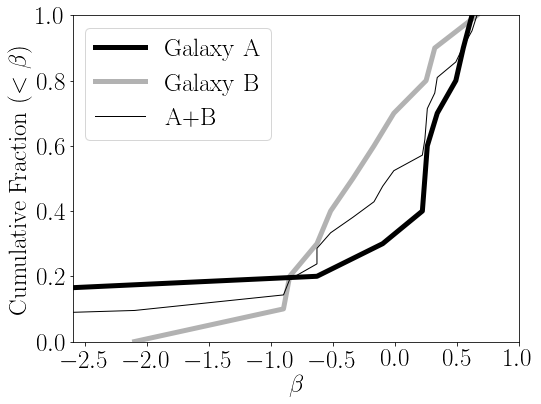

In [11]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

n_points = len(data_halo_A['beta'])
cum_profile = np.linspace(0,1.0, n_points)
sorted_A = np.sort(data_halo_A['beta'])
sorted_B = np.sort(data_halo_B['beta'])



plt.plot(sorted_A, cum_profile, label='Galaxy A', color='black', linewidth=5)
plt.plot(sorted_B, cum_profile, label='Galaxy B', color='black', linewidth=5, alpha=0.3)

sorted_AB = np.sort(np.concatenate((sorted_A, sorted_B)))
cum_profile_AB = np.linspace(0,1.0, n_points*2)
plt.plot(sorted_AB, cum_profile_AB, label='A+B', color='black', linewidth=1)

#plt.axes().set_aspect('equal'
plt.xticks(np.arange(-6,2,0.5))
plt.yticks(np.arange(0,2,0.2))
plt.xlim([-2.6,1])
plt.ylim([0,1.0])
plt.legend(loc=2)
plt.xlabel(r"$\beta$")
plt.ylabel(r"Cumulative Fraction ($<\beta$)")
plt.savefig("../paper/beta.pdf", bbox_inches='tight')

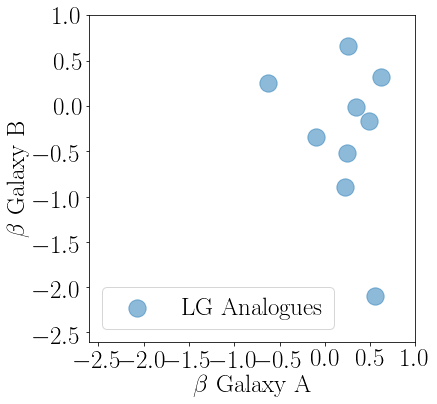

In [25]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

n_points = len(data_halo_A['beta'])
cum_profile = np.linspace(0,1.0, n_points)
sorted_A = np.sort(data_halo_A['beta'])
sorted_B = np.sort(data_halo_B['beta'])


plt.scatter(data_halo_A['beta'], data_halo_B['beta'], label='LG Analogues', s=300, alpha=0.5)

sorted_AB = np.sort(np.concatenate((sorted_A, sorted_B)))
cum_profile_AB = np.linspace(0,1.0, n_points*2)
#plt.plot(sorted_AB, cum_profile_AB, label='A+B', color='black', linewidth=1)

plt.axes().set_aspect('equal')
plt.xticks(np.arange(-6,2,0.5))
plt.yticks(np.arange(-6,2,0.5))
plt.xlim([-2.6,1])
plt.ylim([-2.6,1])
plt.legend(loc=3)
plt.xlabel(r"$\beta$ Galaxy A")
plt.ylabel(r"$\beta$ Galaxy B")
plt.savefig("../paper/beta_scatter.pdf", bbox_inches='tight')

0.3
43.19


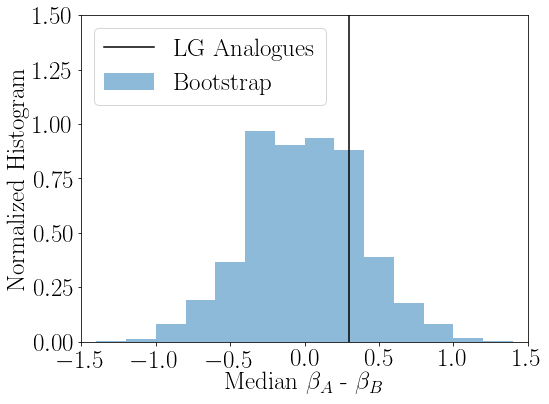

In [68]:
fig = plt.figure(1, figsize=(8,6))
data_A = data_halo_A['beta']
data_B = data_halo_B['beta']
all_data = np.concatenate((data_A, data_B))
n_points = len(all_data)
ids = np.arange(n_points)

KS_value_0 = np.percentile(data_A - data_B, q=50)
n_values = 10000
KS_values = np.zeros(n_values)
print(KS_value_0)
for i in range(n_values):
    id_A = np.random.choice(ids, size=len(data_A),replace=False)
    id_B = np.array(list(set(ids)-set(id_A)))
    KS_values[i] = np.percentile(all_data[id_A] - all_data[id_B],q=50)
    
a = plt.hist(KS_values, bins=np.arange(-1.6,1.6,0.2), alpha=0.5, normed=True, label='Bootstrap')
a = plt.xticks(np.arange(-3,3,0.5))
plt.xlim([-1.5,1.5])
plt.ylim([0,1.5])
plt.axvline(x=KS_value_0, color='black', label='LG Analogues')
plt.xlabel(r"Median $\beta_A$ - $\beta_B$")
plt.ylabel(r"Normalized Histogram")
plt.legend()
print(100*np.count_nonzero((np.abs(KS_values)>np.abs(KS_value_0)))/n_values)
plt.savefig("../paper/beta_bootstrap.pdf", bbox_inches='tight')

[ 0.14179441  0.35709629  0.33113015  0.13134015  0.71302655  0.37198394
  0.51240644  0.50893118  0.02293578  0.79503811  0.16337711]


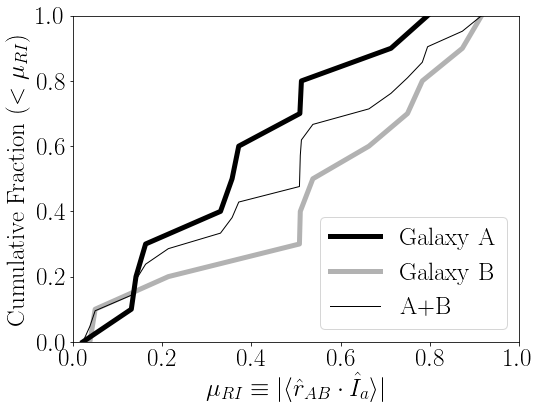

In [13]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

n_points = len(data_halo_A['beta'])
cum_profile = np.linspace(0,1.0, n_points)

norm_r = np.sqrt(data_halo_A['r_ab_x']**2 + data_halo_A['r_ab_y']**2 + data_halo_A['r_ab_z']**2)
mu_A = np.abs(data_halo_A['r_ab_x']*data_halo_A['Ia_x']
           +data_halo_A['r_ab_y']*data_halo_A['Ia_y']
           +data_halo_A['r_ab_z']*data_halo_A['Ia_z'])/norm_r
sorted_mu_A = np.sort(mu_A)

mu_B = np.abs(data_halo_B['r_ab_x']*data_halo_B['Ia_x']
           +data_halo_B['r_ab_y']*data_halo_B['Ia_y']
           +data_halo_B['r_ab_z']*data_halo_B['Ia_z'])/norm_r
sorted_mu_B = np.sort(mu_B)

print(mu_A)
plt.plot(sorted_mu_A, cum_profile, label='Galaxy A', color='black', linewidth=5)
plt.plot(sorted_mu_B, cum_profile, label='Galaxy B', color='black', linewidth=5, alpha=0.3)

sorted_AB = np.sort(np.concatenate((sorted_mu_A, sorted_mu_B)))
cum_profile_AB = np.linspace(0,1.0, n_points*2)
plt.plot(sorted_AB, cum_profile_AB, label='A+B', color='black', linewidth=1)

#plt.plot(sorted_B, cum_profile, label='Galaxy B', color='black', linewidth=4, alpha=0.3)

#plt.axes().set_aspect('equal')
plt.xticks(np.arange(-6,2,0.2))
plt.yticks(np.arange(-6,2,0.2))
plt.xlim([0,1])
plt.ylim([0,1.0])
plt.legend(loc=4)
plt.xlabel(r"$\mu_{RI}\equiv |\langle\hat{r}_{AB}\cdot \hat{I}_a\rangle|$")
plt.ylabel(r"Cumulative Fraction ($<\mu_{RI}$)")
plt.savefig("../paper/mu_ri_cum.pdf", bbox_inches='tight')

[ 0.14179441  0.35709629  0.33113015  0.13134015  0.71302655  0.37198394
  0.51240644  0.50893118  0.02293578  0.79503811  0.16337711]


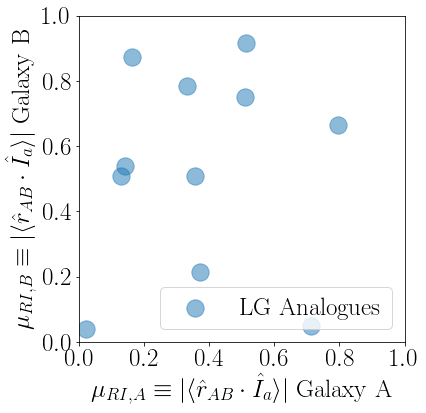

In [60]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

n_points = len(data_halo_A['beta'])
cum_profile = np.linspace(0,1.0, n_points)

norm_r = np.sqrt(data_halo_A['r_ab_x']**2 + data_halo_A['r_ab_y']**2 + data_halo_A['r_ab_z']**2)
mu_A = np.abs(data_halo_A['r_ab_x']*data_halo_A['Ia_x']
           +data_halo_A['r_ab_y']*data_halo_A['Ia_y']
           +data_halo_A['r_ab_z']*data_halo_A['Ia_z'])/norm_r
sorted_mu_A = np.sort(mu_A)

mu_B = np.abs(data_halo_B['r_ab_x']*data_halo_B['Ia_x']
           +data_halo_B['r_ab_y']*data_halo_B['Ia_y']
           +data_halo_B['r_ab_z']*data_halo_B['Ia_z'])/norm_r
sorted_mu_B = np.sort(mu_B)

print(mu_A)
plt.scatter(mu_A, mu_B, label='LG Analogues', s=300, alpha=0.5)


plt.axes().set_aspect('equal')
plt.xticks(np.arange(-6,2,0.2))
plt.yticks(np.arange(-6,2,0.2))
plt.xlim([0,1])
plt.ylim([0,1.0])
plt.legend(loc=4)
plt.xlabel(r"$\mu_{RI,A}\equiv |\langle\hat{r}_{AB}\cdot \hat{I}_a\rangle|$ Galaxy A")
plt.ylabel(r"$\mu_{RI,B}\equiv |\langle\hat{r}_{AB}\cdot \hat{I}_a\rangle|$ Galaxy B")

plt.savefig("../paper/mu_ri_scatter.pdf", bbox_inches='tight')

-0.24109999883
14.17


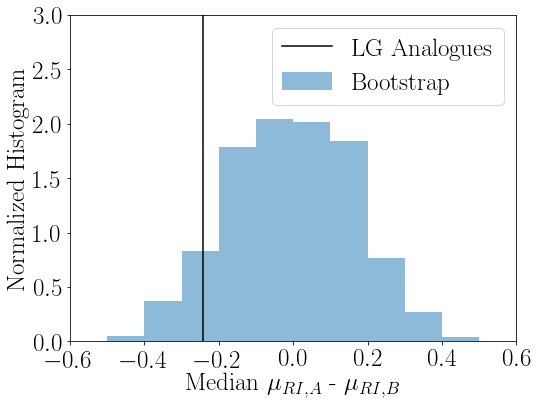

In [67]:
fig = plt.figure(1, figsize=(8,6))

norm_r = np.sqrt(data_halo_A['r_ab_x']**2 + data_halo_A['r_ab_y']**2 + data_halo_A['r_ab_z']**2)

data_A = np.abs(data_halo_A['r_ab_x']*data_halo_A['Ia_x']
           +data_halo_A['r_ab_y']*data_halo_A['Ia_y']
           +data_halo_A['r_ab_z']*data_halo_A['Ia_z'])/norm_r
data_B = np.abs(data_halo_B['r_ab_x']*data_halo_B['Ia_x']
           +data_halo_B['r_ab_y']*data_halo_B['Ia_y']
           +data_halo_B['r_ab_z']*data_halo_B['Ia_z'])/norm_r

all_data = np.concatenate((data_A, data_B))
n_points = len(all_data)
ids = np.arange(n_points)
KS_value_0 = np.percentile(data_A - data_B, q=50) 
n_values = 10000
KS_values = np.zeros(n_values)
print(KS_value_0)
for i in range(n_values):
    id_A = np.random.choice(ids, size=len(data_A), replace=False)
    id_B = np.array(list(set(ids)-set(id_A)))
    KS_values[i] = np.percentile(all_data[id_A] - all_data[id_B],q=50)
a = plt.hist(KS_values, bins=np.arange(-0.5,0.6,0.1), alpha=0.5, normed=True, label='Bootstrap')
a = plt.xticks(np.arange(-1,1,0.2))
plt.xlim([-0.6,0.6])
plt.ylim([0,3.0])
plt.axvline(x=KS_value_0, color='black', label='LG Analogues')
plt.xlabel(r"Median $\mu_{RI,A}$ - $\mu_{RI,B}$")
plt.ylabel(r"Normalized Histogram")
plt.legend()
print(100*np.count_nonzero(np.abs(KS_values)>np.abs(KS_value_0))/n_values)
plt.savefig("../paper/mu_ri_bootstrap.pdf", bbox_inches='tight')

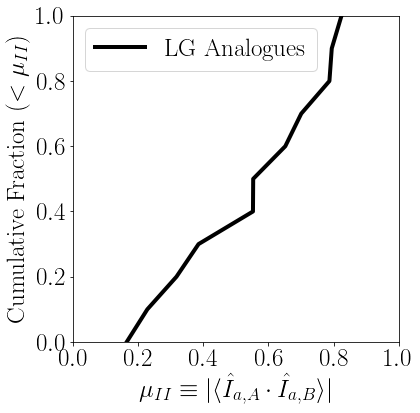

In [69]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

n_points = len(data_halo_A['beta'])
cum_profile = np.linspace(0,1.0, n_points)

mu_ii = np.abs(data_halo_A['Ia_x']*data_halo_B['Ia_x']
           +data_halo_A['Ia_y']*data_halo_B['Ia_y']
           +data_halo_A['Ia_z']*data_halo_B['Ia_z'])
sorted_mu_ii= np.sort(mu_ii)

plt.plot(sorted_mu_ii, cum_profile, label='LG Analogues', color='black', linewidth=4)

plt.axes().set_aspect('equal')
plt.xticks(np.arange(-6,2,0.2))
plt.yticks(np.arange(-6,2,0.2))
plt.xlim([0,1])
plt.ylim([0,1.0])
plt.legend(loc=2)
plt.xlabel(r"$\mu_{II}\equiv |\langle\hat{I}_{a,A}\cdot \hat{I}_{a,B} \rangle|$")
plt.ylabel(r"Cumulative Fraction ($<\mu_{II}$)")
plt.savefig("../paper/mu_ii_cum.pdf", bbox_inches='tight')